In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/mental-health-sentiments/raw.csv")

In [3]:
df = data

In [4]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [5]:
df.shape

(53043, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [7]:
df.rename(columns = {
    "statement" : "text",
    "status" : "label"
},inplace=True)

In [8]:
df.head()

,Unnamed: 0,text,label
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [9]:
### Unique labels 
print(f"There are {df['label'].nunique()} unique labels and these are {df['label'].unique()}")

There are 7 unique labels and these are ['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


## Text Preprocessing

In [10]:
## Creating new column for preprocessing
df["Original Text"] = df["text"]

In [11]:
df.head()

,Unnamed: 0,text,label,Original Text
0,0,oh my gosh,Anxiety,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,"trouble sleeping, confused mind, restless hear..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"All wrong, back off dear, forward doubt. Stay ..."
3,3,I've shifted my focus to something else but I'...,Anxiety,I've shifted my focus to something else but I'...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,"I'm restless and restless, it's been a month n..."


In [12]:
## Dropping Unnamed:0 
df.drop("Unnamed: 0", axis= 1,inplace =True)

In [13]:
df.head()

,text,label,Original Text
0,oh my gosh,Anxiety,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"trouble sleeping, confused mind, restless hear..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"All wrong, back off dear, forward doubt. Stay ..."
3,I've shifted my focus to something else but I'...,Anxiety,I've shifted my focus to something else but I'...
4,"I'm restless and restless, it's been a month n...",Anxiety,"I'm restless and restless, it's been a month n..."


In [14]:
## Checking for missing values
df.isnull().sum()

text             362
label              0
Original Text    362
dtype: int64

In [15]:
df[df["text"].isnull()]

,text,label,Original Text
293,NaN,Anxiety,NaN
572,NaN,Anxiety,NaN
595,NaN,Anxiety,NaN
1539,NaN,Normal,NaN
2448,NaN,Normal,NaN
...,...,...,...
52838,NaN,Anxiety,NaN
52870,NaN,Anxiety,NaN
52936,NaN,Anxiety,NaN
53010,NaN,Anxiety,NaN


**As there is no clue or not having any idea to fill these missing values. So we will drop these all.**

In [16]:
df.dropna(inplace = True)

In [17]:
df.reset_index(inplace =True)

In [18]:
df.sample(6)

,index,text,label,Original Text
23382,23392,I am just so tired of it. Everything I loved a...,Suicidal,I am just so tired of it. Everything I loved a...
29838,29848,"It’s almost a 50/50 mindset, because on one ha...",Stress,"It’s almost a 50/50 mindset, because on one ha..."
16394,16404,My anger of people wronging me is making me de...,Depression,My anger of people wronging me is making me de...
41352,41364,tw depression okay besties i need some help op...,Depression,tw depression okay besties i need some help op...
5954,5963,Poor randa sm ocaðŸ¤£,Normal,Poor randa sm ocaðŸ¤£
1140,1143,Bae!,Normal,Bae!


In [19]:
df.drop(["index"],axis = 1,inplace =True)

In [20]:
df.shape

(52681, 3)

In [21]:
## Checking text that contains no values
df[df["text"].str.strip() == ""]

,text,label,Original Text


* There is no blank text.

In [22]:
## Cheking for duplicated text
df.duplicated().sum()

1588

In [23]:
df[df.duplicated()]

,text,label,Original Text
97,"""No regrets or grudges/angry at things that ha...",Anxiety,"""No regrets or grudges/angry at things that ha..."
138,but my heart is still restless even though my ...,Anxiety,but my heart is still restless even though my ...
167,I want to exhale the restlessness in my chest ...,Anxiety,I want to exhale the restlessness in my chest ...
228,Do not compare yourself to others. Envy only m...,Anxiety,Do not compare yourself to others. Envy only m...
244,"people seem calm, happy like there's no proble...",Anxiety,"people seem calm, happy like there's no proble..."
...,...,...,...
52676,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,Nobody takes me seriously I’ve (24M) dealt wit...
52677,"selfishness ""I don't feel very good, it's lik...",Anxiety,"selfishness ""I don't feel very good, it's lik..."
52678,Is there any way to sleep better? I can't slee...,Anxiety,Is there any way to sleep better? I can't slee...
52679,"Public speaking tips? Hi, all. I have to give ...",Anxiety,"Public speaking tips? Hi, all. I have to give ..."


* As the data contains 1588 duplicated records.

In [24]:
df.drop_duplicates(inplace =True)

In [25]:
df.reset_index(inplace =True)

In [26]:
df.drop("index",axis= 1,inplace =True)

In [27]:
### Checking text that contains "\n"
df[df["text"].str.contains("\n")]

,text,label,Original Text
33576,"Final doctor appointment tomorrow, tired of co...",Anxiety,"Final doctor appointment tomorrow, tired of co..."
33579,Weekly /r/HealthAnxiety Challenge - Exercise A...,Anxiety,Weekly /r/HealthAnxiety Challenge - Exercise A...
33580,This is killing me So i had a bacterial stomac...,Anxiety,This is killing me So i had a bacterial stomac...
33582,"Health anxiety following stomach flu, anyone e...",Anxiety,"Health anxiety following stomach flu, anyone e..."
33583,The worst things about hypochondria Hypochondr...,Anxiety,The worst things about hypochondria Hypochondr...
...,...,...,...
51085,Anxiety Over Having Made No Accomplishments in...,Anxiety,Anxiety Over Having Made No Accomplishments in...
51086,Physical side of Anxiety (Possible emetophobia...,Anxiety,Physical side of Anxiety (Possible emetophobia...
51087,anxiety progress/my story Hey guys! \n\nI’ve b...,Anxiety,anxiety progress/my story Hey guys! \n\nI’ve b...
51090,Travel Anxiety Hi all! Long time anxiety suffe...,Anxiety,Travel Anxiety Hi all! Long time anxiety suffe...


In [28]:
df.loc[33576,"text"]

'Final doctor appointment tomorrow, tired of constantly seeking reassurance! Ive decided that Im having my final doctor appointment tomorrow, this is something that has been a huge battle for me, but over the last weeks I have decided that this is the only way I can and will make it out of this anxiety.\n\n\nHere is the deal: I have been experiencing multiple symptoms as mentioned before in other posts, the symptoms have varied from Brain fog, dizzyness, blurred vision, sore throat, swollen tonsils, coating on my tongue (yellow and white) very reduced energy, fatigue and headaches. The thing is that my sore throat and coating on my tongue wont go away, and my doctor said to come back if it didnt fade over time, the other symptoms tend to come and go so Ive kinda figured out that these are my main anxiety symptoms, which is good because then I know when im getting anxious and stressed out!\n\nIve been a very heavy caffeine user over the past 2-3 years and ive tried to minimalize the usa

In [29]:
### Replacing \n with " "
df["text"] = df["text"].str.replace("\n","")

In [30]:
df["word_count"] = df["text"].str.split().str.len()

In [31]:
df.head()

,text,label,Original Text,word_count
0,oh my gosh,Anxiety,oh my gosh,3
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"trouble sleeping, confused mind, restless hear...",10
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"All wrong, back off dear, forward doubt. Stay ...",14
3,I've shifted my focus to something else but I'...,Anxiety,I've shifted my focus to something else but I'...,11
4,"I'm restless and restless, it's been a month n...",Anxiety,"I'm restless and restless, it's been a month n...",14


In [32]:
df["word_count"].describe()

count    51093.000000
mean       112.482101
std        163.778849
min          1.000000
25%         15.000000
50%         61.000000
75%        147.000000
max       6300.000000
Name: word_count, dtype: float64

In [33]:
## Checking for text having only 1 word
df[df["word_count"] == 1]

,text,label,Original Text,word_count
88,Anxious,Anxiety,Anxious,1
414,anxious,Anxiety,anxious,1
732,chat.,Normal,chat.,1
813,cement,Normal,cement,1
818,SEBASTIANN,Normal,SEBASTIANN,1
...,...,...,...,...
42563,oishiieats,Normal,oishiieats,1
42717,thisisguan,Normal,thisisguan,1
43298,beeeaaach,Normal,beeeaaach,1
43970,anothera,Normal,anothera,1


In [34]:
## text with less word_count are also relevant.

In [35]:
import nltk

In [36]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [37]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords

In [39]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stopword = set(stopwords.words("english"))

In [41]:
import re
from nltk.corpus import wordnet

In [42]:
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [43]:
def get_wordnet_pos(nltk_pos_tag):
    if nltk_pos_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_pos_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if unknown

In [44]:
def preprocessing_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stopword]    
    pos_tags = nltk.pos_tag(words)
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    return " ".join(words)

In [45]:
df["text"] = df["text"].apply(preprocessing_text)

<Figure size 700x700 with 0 Axes>

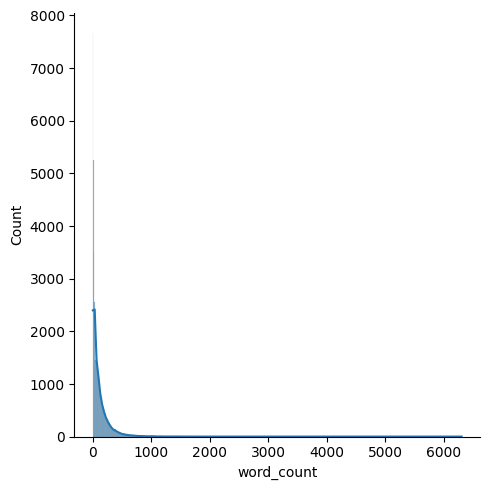

In [46]:
### Visualizing word_count for each text
plt.figure(figsize = (7,7))
sns.displot(data = df,x = "word_count",kde = True)

* There is a high spike for the word count in the range of 0 to 500.
* Few texts are there having word count upto 6000.


In [47]:
df["new_word_count"] = df["text"].str.split().str.len()

In [48]:
df.loc[13203,"text"]

'cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore cannot take anymore

* Text having word count 6000 is just repetitive, in which "cannot take anymore" is repeated in whole text.

In [49]:
df[df["word_count"] >= 1000].shape

(205, 5)

* There are 205 text that contains word more than 1000.

### Wordcloud for each category

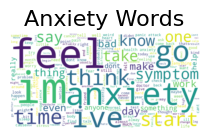

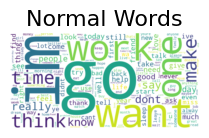

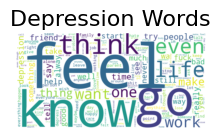

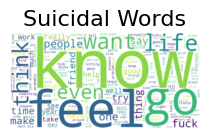

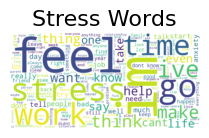

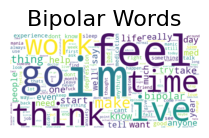

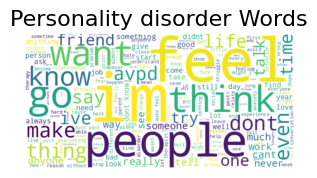

In [50]:
from wordcloud import WordCloud


sentiments = df["label"].unique()

for i, label in enumerate(sentiments):
    text = " ".join(df[df['label'] == label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize = (20,20))

    plt.subplot(1, len(sentiments), i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{label.capitalize()} Words", fontsize=16)

plt.tight_layout()
plt.show()


**feel is the most common word among all category.**

In [51]:
## As we are dealing with the data, that contain repetition of words so instead of deleting the duplicate words we will use Tf-IDf vectorization technique because it deals with duplicate words very easily.

In [53]:
df.isnull().sum()

text              0
label             0
Original Text     0
word_count        0
new_word_count    0
dtype: int64

In [55]:
## Saving Preprocessor

import pickle

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessing_text, f)


In [59]:
df.to_csv('preprocessed_text_data.csv', index=False)